# Seaborn 

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

For a brief introduction to the ideas behind the library, you can read the introductory notes. Visit the installation page to see how you can download the package and get started with it. You can browse the example gallery to see what you can do with seaborn, and then check out the tutorial and API reference to find out how.
[here](https://seaborn.pydata.org/examples/index.html)

# Useful Ressources:

 http://matplotlib.org/ 
 
 https://seaborn.pydata.org/examples/index.html
 
 https://www.kaggle.com/learn/data-visualization

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
import mysql.connector as mysqlConnector
import sqlite3
import pandas as pd

In [3]:
connection = mysqlConnector.connect(host='localhost',
                        user='root',
                        password='Zoubida1',
                        database='foody')
if connection:
    print("Connection successful to foody database")
else:
    print("Connection failed")

Connection successful to foody database


In [4]:
query1 = 'SELECT * FROM Produit ORDER BY NoFour LIMIT 6'
df1=pd.read_sql(query1,connection)
df1

,RefProd,NomProd,NoFour,CodeCateg,QteParUnit,PrixUnit,UnitesStock,UnitesCom,NiveauReap,Indisponible
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
5,65,Louisiana Fiery Hot Pepper Sauce,2,2,32 - 8 oz bottles,21.05,76,0,0,0


In [19]:
query2 = 'SELECT NoFour, ROUND( AVG(PrixUnit),2) AS MPF FROM Produit GROUP BY NoFour'
df2=pd.read_sql(query2,connection)
df2

,NoFour,MPF
0,1,15.67
1,2,20.35
2,3,31.67
3,4,46.00
4,5,29.50
5,6,14.92
6,7,35.57
7,8,28.17
8,9,15.00
9,10,4.50


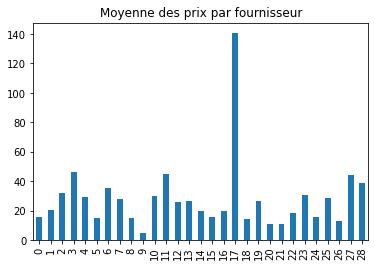

In [27]:
query3 = 'SELECT NoFour, ROUND( AVG(PrixUnit),2) AS MPF FROM Produit GROUP BY NoFour '
df3=pd.read_sql(query3,connection)
df3.MPF.plot(kind='bar',title ='Moyenne des prix par fournisseur');




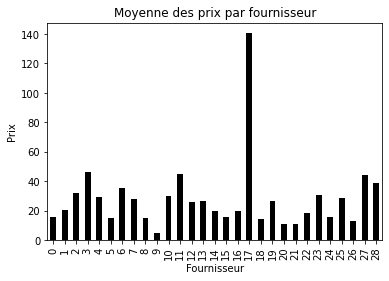

In [6]:
query4 = 'SELECT NoFour, ROUND( AVG(PrixUnit),2) AS MPF FROM Produit GROUP BY NoFour' # Order by MPF ASC
df4=pd.read_sql(query4,connection)
df4.MPF.plot(xlabel='Fournisseur', ylabel='Prix',color='black', kind='bar',title ='Moyenne des prix par fournisseur');

#plot(x, y, color='green', marker='o', linestyle='dashed'

## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

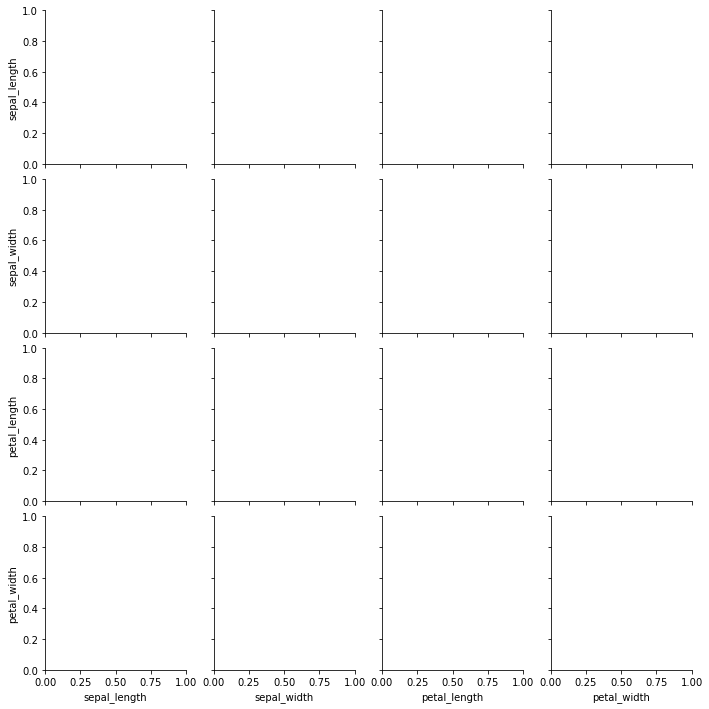

In [4]:
# Just the Grid
sns.PairGrid(iris)

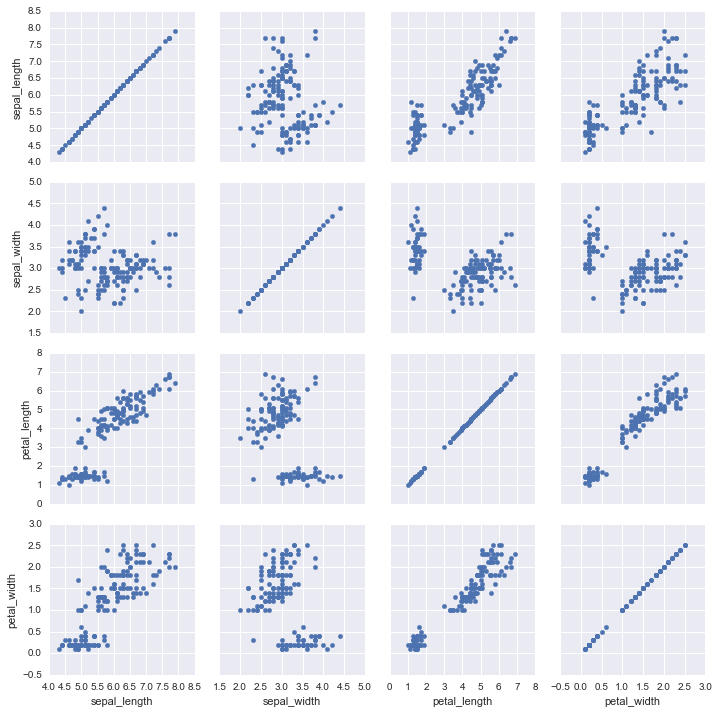

In [26]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

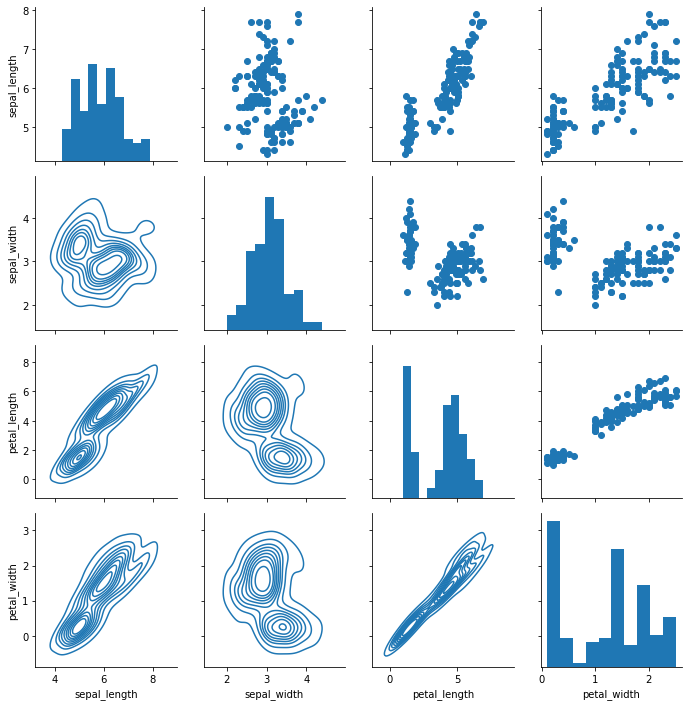

In [8]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot

pairplot is a simpler version of PairGrid (you'll use quite often)

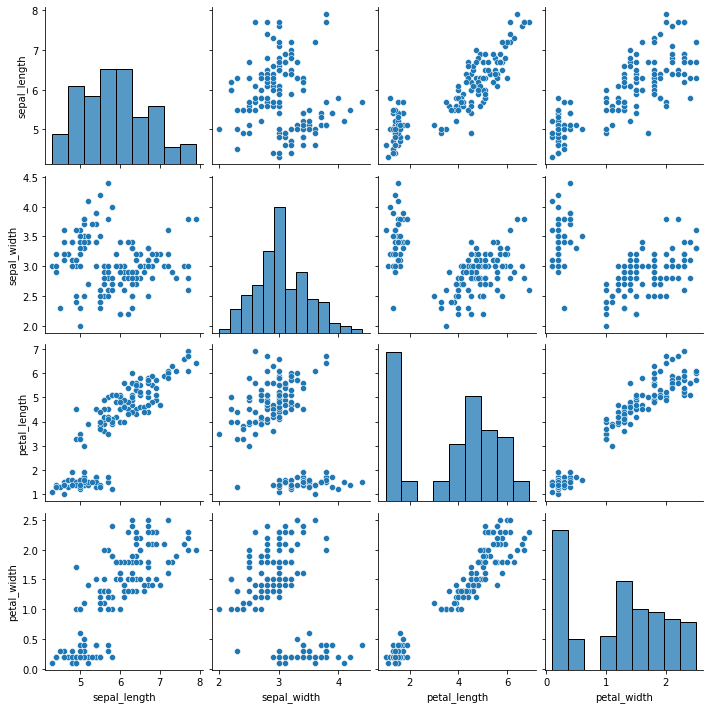

In [9]:
sns.pairplot(iris)

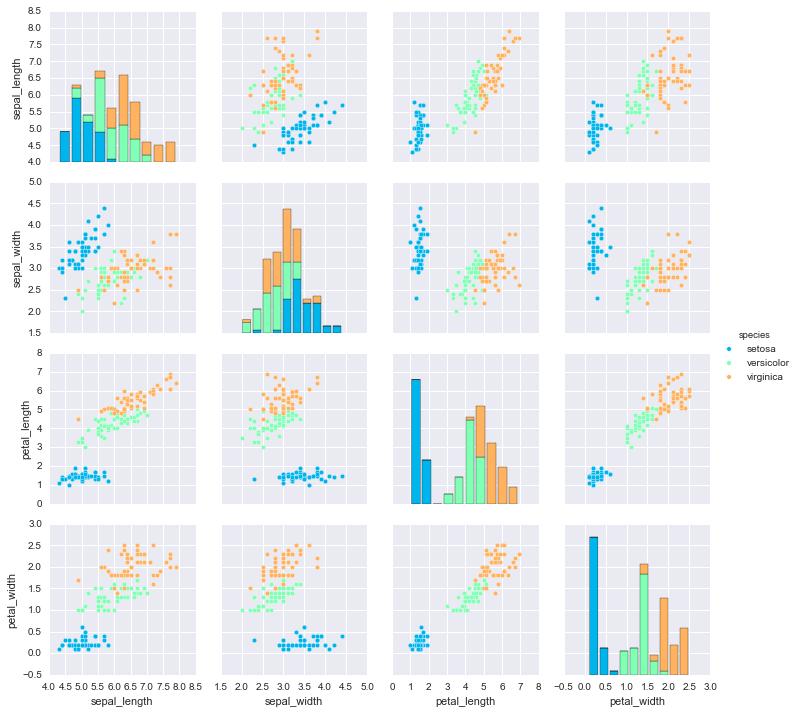

In [33]:
sns.pairplot(iris,hue='species',palette='rainbow')


## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

In [4]:
tips = sns.load_dataset('tips')


In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

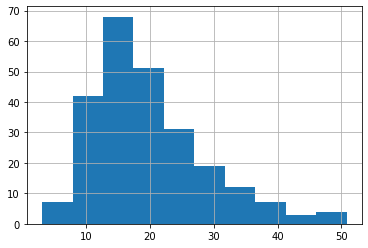

In [6]:
tips['total_bill'].hist()


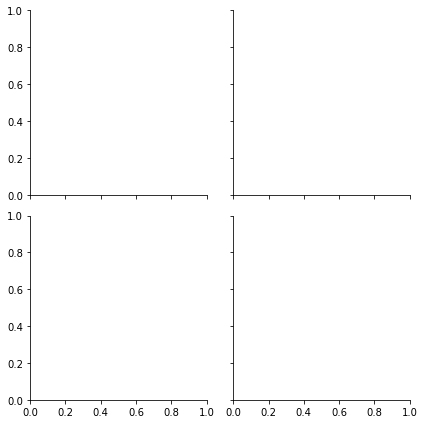

In [12]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

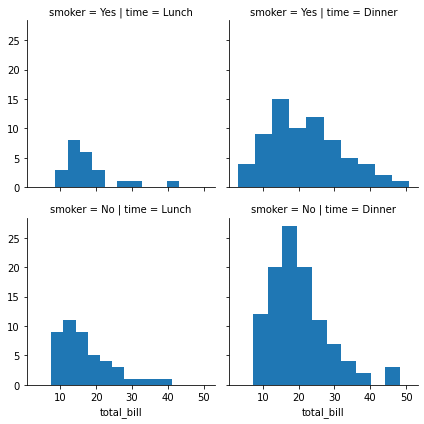

In [13]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

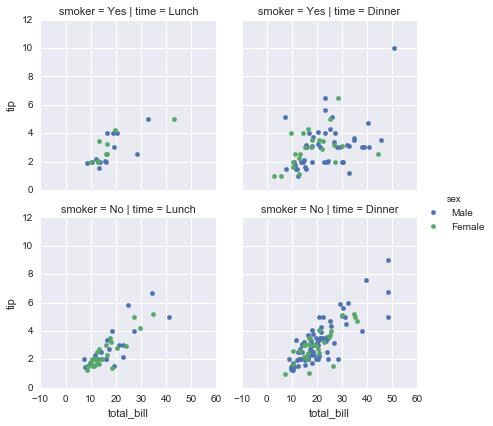

In [42]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

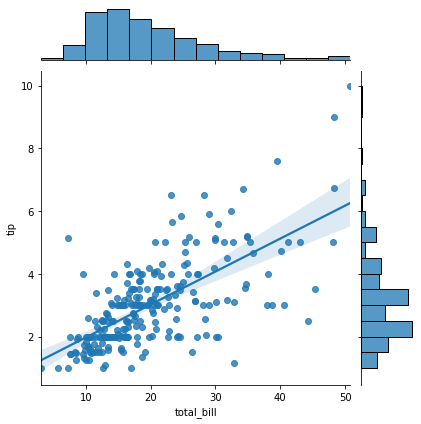

In [17]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.histplot)

Reference the documentation as necessary for grid types! [here](http://seaborn.pydata.org/tutorial/axis_grids.html)

# Distribution Plots

plots , we can use, to visualize the distribution of a data set. These plots are:
 * histplot()
 * kdeplot()
 * rugplot()
 
They are grouped together within the figure-level 
 * displot()
 * jointplot()
 * pairplot()

[here](https://seaborn.pydata.org/tutorial/distributions.html)

**Imports**

In [11]:
import seaborn as sns
%matplotlib inline

**Data**
Seaborn comes withsome built-in data sets!

In [12]:
tips = sns.load_dataset('tips')

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## displot

The displot shows the distribution of a univariate set of observations.

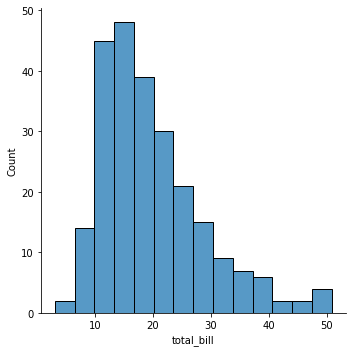

In [14]:
sns.displot(tips['total_bill'])

<AxesSubplot:ylabel='Frequency'>

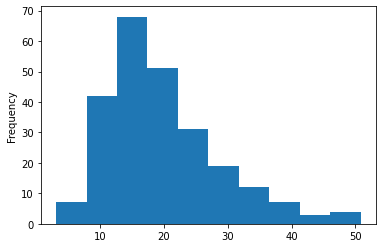

In [17]:
tips['total_bill'].plot.hist()

In [14]:
pd.DataFrame.plot.hist?

To remove the kde layer and just have the histogram use:

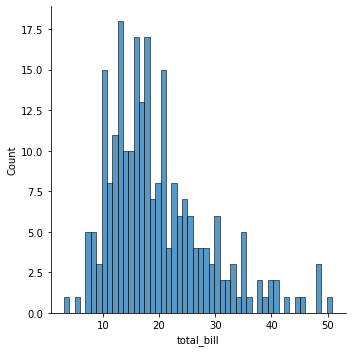

In [15]:
sns.displot(tips['total_bill'],kde=False,bins=50)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

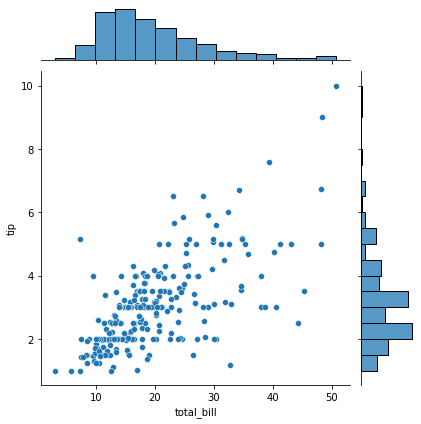

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

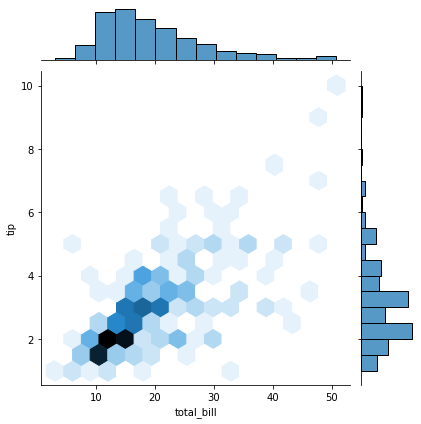

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

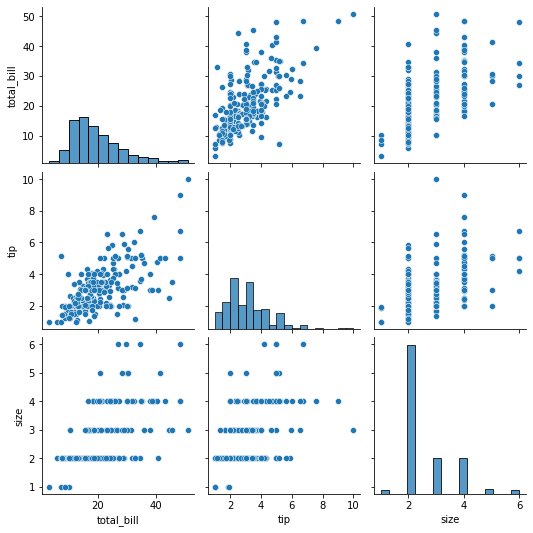

In [18]:
sns.pairplot(tips)

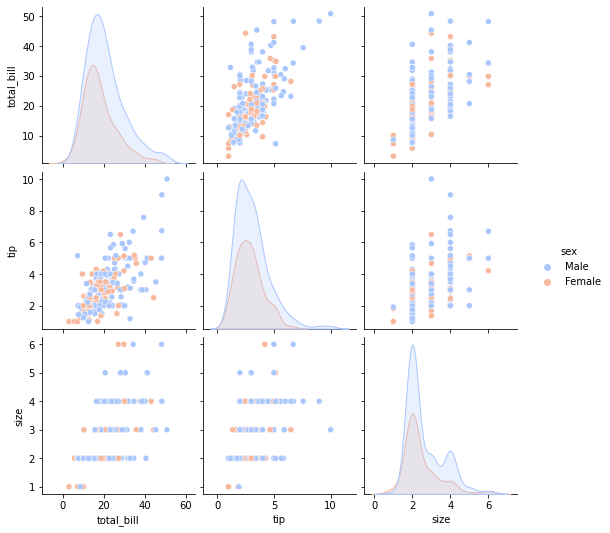

In [19]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot:xlabel='total_bill'>

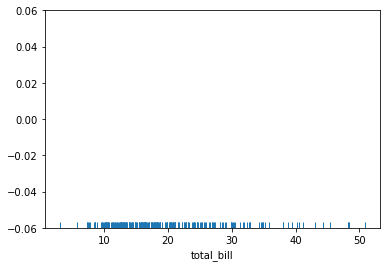

In [20]:
sns.rugplot(tips['total_bill'])

## kdeplot


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

So with our tips dataset:

In [26]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

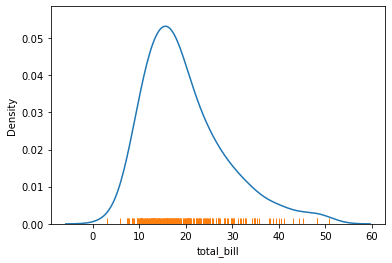

In [22]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

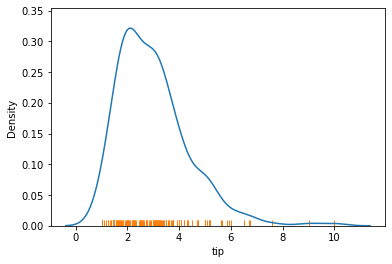

In [23]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [5]:
import seaborn as sns
%matplotlib inline

In [6]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

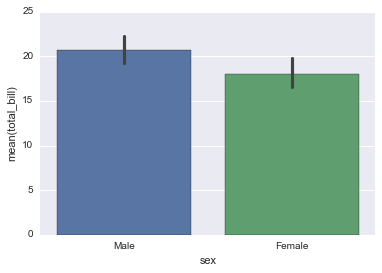

In [8]:
sns.barplot(x='sex',y='total_bill',data=tips)


In [10]:
import numpy as np

You can change the estimator object to your own function, that converts a vector to a scalar:

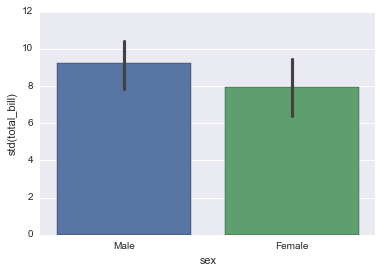

In [11]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

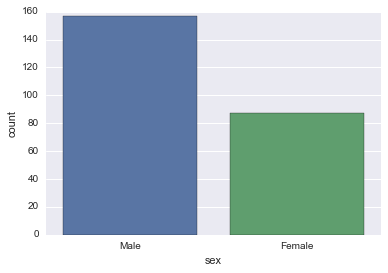

In [13]:
sns.countplot(x='sex',data=tips)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

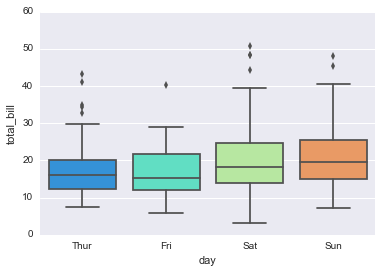

In [22]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

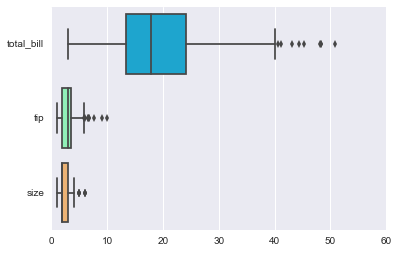

In [25]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')


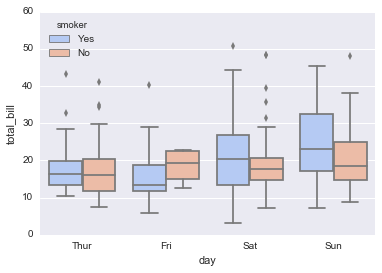

In [26]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")


### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

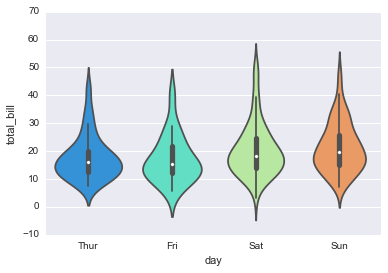

In [27]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

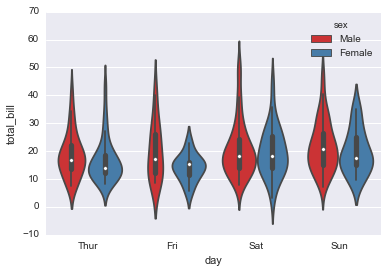

In [37]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')


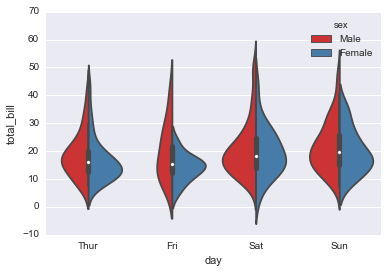

In [36]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

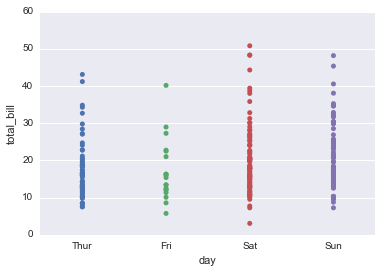

In [38]:
sns.stripplot(x="day", y="total_bill", data=tips)

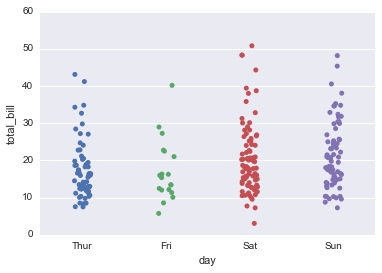

In [39]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

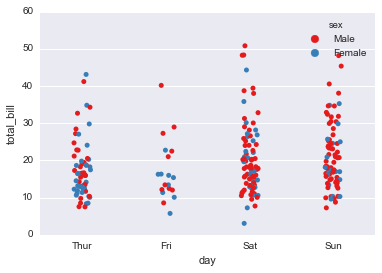

In [42]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

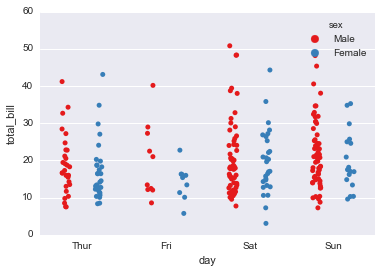

In [43]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

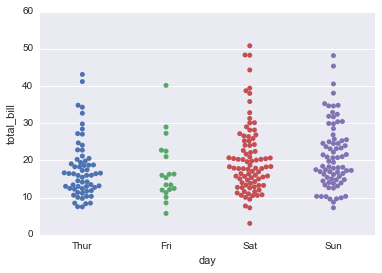

In [44]:
sns.swarmplot(x="day", y="total_bill", data=tips)

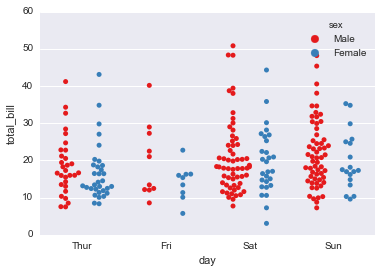

In [47]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

### Combining Categorical Plots

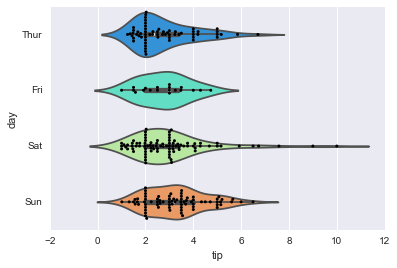

In [61]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## factorplot

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

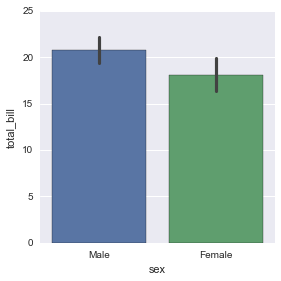

In [15]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [1]:
import seaborn as sns
%matplotlib inline

In [5]:
flights = sns.load_dataset('flights')


In [6]:
tips = sns.load_dataset('tips')

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


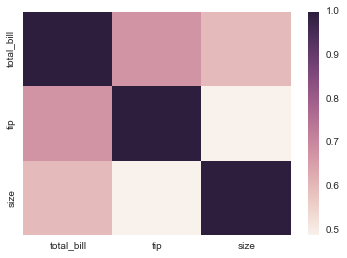

In [16]:
sns.heatmap(tips.corr())


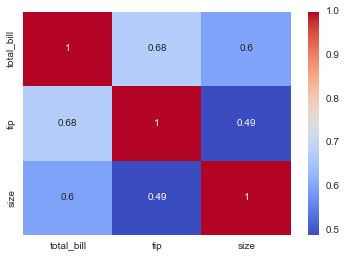

In [19]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Or for the flights data:

In [23]:
flights.pivot_table(values='passengers',index='month',columns='year')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


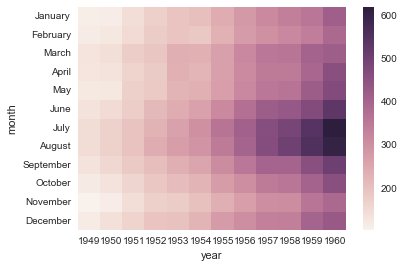

In [24]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

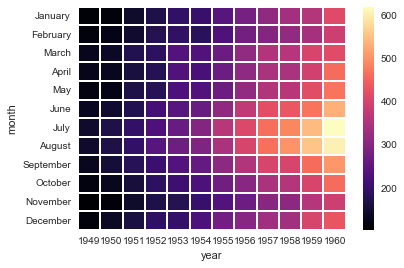

In [30]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

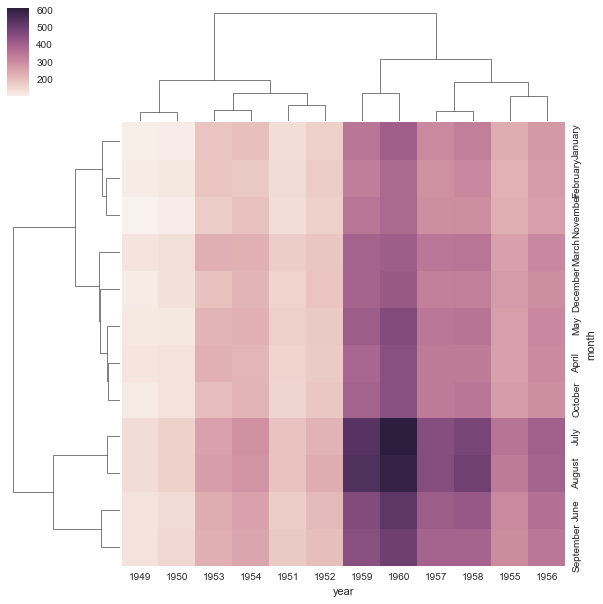

In [31]:
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

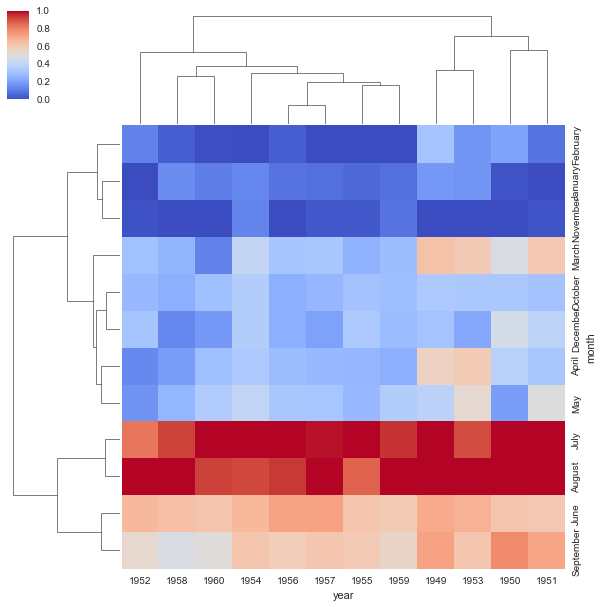

In [34]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)